<div style="border:solid green 2px; padding: 20px">
    
Дмитрий, привет! Меня зовут Бунакова Влада. Если не возражаешь, предлагаю общаться на «ты» :)

Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='orange'>желтый — «хорошо, но можно лучше (один-два таких замечаний допустимы, но если их больше — придется исправлять)»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке. Будет здорово, если в своих новых комментариях (выделяй их другим цветом) ты напишешь о сделанных тобой изменениях в коде.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Влада привет! Спасибо за оценку моего проекта. Постарался поправить, где смог, но какие-то вещи, которых нет в тренажере 
я не разобрался как сделать, например, как передать в функцию гиперпараметры.
Результат на тестовой выборке полсе внесения изменений теперь в три раза меньше, чем на валидационной. Я не понимаю, что делаю не так. Я не правильно разделил данные выборки? Объясни мне в чем проблема, пожалуйста. Я не могу понять. 
</div>

<div style="border:solid green 2px; padding: 20px">
Дмитрий, спасибо за доработки! Комментарии см. по ходу работы.

<div style="border:solid green 2px; padding: 20px">
Дмитрий, спасибо, осталось исправить мелкие неточности.

<div style="border:solid green 2px; padding: 20px">
Дмитрий, проект принимаю! :)

## <a id='table of contents'>Содержание</a>  
<a href='#part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>     
<a href='#part2'>2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>    
<a href='#part3'>3. ПРЕДОБРАБОТКА ДАННЫХ</a>    
<a href='#part4'>4. ОБУЧЕНИЕ МОДЕЛЕЙ </a>   
<a href='#part5'> 4.1. БЕЗ УЧЕТА ДИСБАЛАНСА КЛАССОВ</a>    
<a href='#part6'>4.2. C УЧЕТОМ ДИСБАЛАНСА КЛАССОВВ</a>     
<a href='#part7'>4.2.1. ОБУЧИМ МОДЕЛИ С УЧЕТОМ ВЕСА</a>     
<a href='#part8'>4.2.2. ПРИМЕНИМ ТЕХНИКУ upsampling </a>     
<a href='#part9'>4.2.3. ПРИМЕНИМ ТЕХНИКУ downsampling </a>     
<a href='#part10'>5. ПРОВЕРКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ </a>     

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Цель:*** Обучить модель классификации, которая будет классифицировать клиентов банка по двум типам (Exited):   
0-лояльные клиенты, 1- лояльные клиенты клиенты.   
***Целевая метрика:*** - F1-мера, ее значение должно быть больше ***0.59***. Дополнительная метрика AUC-ROC.

# <a id='part2'> 2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

### Признаки ###
***RowNumber*** — индекс строки в данных  
***CustomerId*** — уникальный идентификатор клиента  
***Surname*** — фамилия  
***CreditScore*** — кредитный рейтинг  
***Geography*** — страна проживания  
***Gender*** — пол  
***Age*** — возраст  
***Tenure*** — количество недвижимости у клиента  
***Balance*** — баланс на счёте  
***NumOfProducts*** — количество продуктов банка, используемых клиентом  
***HasCrCard*** — наличие кредитной карты  
***IsActiveMember*** — активность клиента  
***EstimatedSalary*** — предполагаемая зарплата  
### Целевой признак###
***Exited*** — факт ухода клиента  

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 

~~Кроме общего описания задачи добавляй план ее решения. Пример:~~
~~### Содержание~~
~~##### Часть 1. Название первой части:~~
~~* [1. Название первого пункта первой части.](#1-bullet)~~
~~* [2. Название второго пункта первой части.](#2-bullet)~~
~~##### Часть 2. Название второй части:~~
~~* [1. Название первого пункта второй части.](#3-bullet)~~
~~* [2. Название второго пункта второй части.](#4-bullet)
и т.д
Про то, как делать ссылки, чтобы переходить к разным частям проекта, читай <a href="https://sebastianraschka.com/Articles/2014_ipython_internal_links.html">тут.</a> ~~

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Сделал оглавление
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
👍
</div>

In [1]:
import pandas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
try:
    df=pd.read_csv('Churn.csv', sep=',') 
except: 
    df=pd.read_csv('/datasets/Churn.csv', sep=',')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


***ВЫВОД 1:*** 
    - Пропуски есть только в столбце Tenure 
    - Некоторые столбцы можно удалить, так как эти данные излишни
    - Существуют столбцы с числовыми данными, но типа Object
    - Категориальные признаки необходимо преобразовать в численные в численные

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Ок, все верно.
</div>

# <a id='part3'>3. ПРЕДОБРАБОТКА ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

Сделаем названия столбцов строчными

In [4]:
def snake_case(s):
    """Преобразование строк из camelCase в snake_case."""
    return ''.join('_' + c.lower()
                   if all([i != 0,
                           c.isupper(),
                           s[i - 1].islower()])
                   else c.lower()
                   for i, c in enumerate(s))

In [5]:
df.columns = map(snake_case, df.columns)
print(df.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Здорово, что преобразуешь названия столбцов не вручную, а с помощью функции.
</div>

Удалим "лишние" признаки 

In [6]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              9091 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Правильно, это признаки не нужны.
</div>

Заполним пропуски в столбце tenure

Int64


Text(0.5, 0, 'Количество объектов недвижимости')

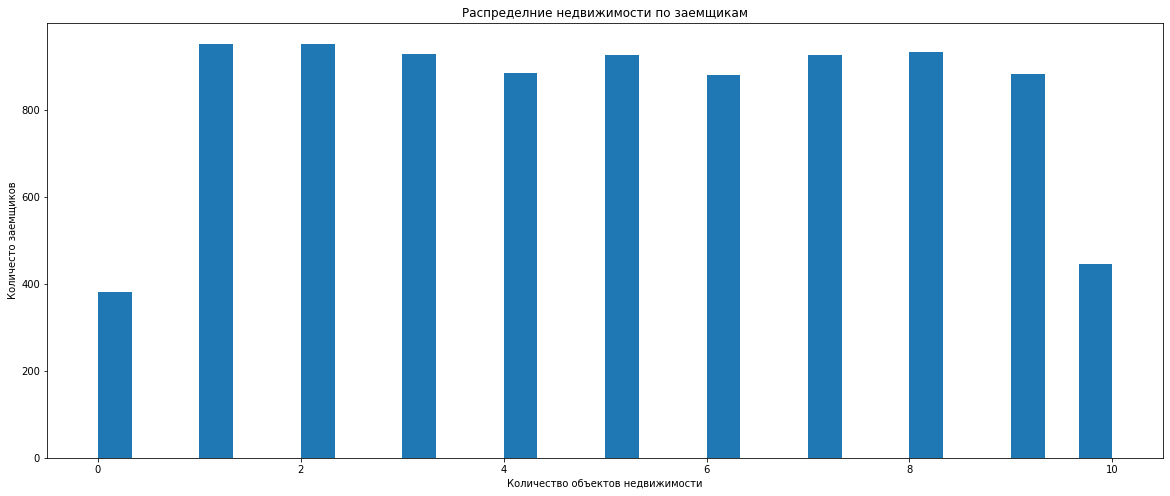

In [7]:
df['tenure'] = df['tenure'].astype('Int64')
print(df['tenure'].dtypes)
df['tenure'].plot(title='Распределние недвижимости по заемщикам', kind='hist', bins=30, figsize=(20,8))
plt.ylabel("Количесто заемщиков")
plt.xlabel("Количество объектов недвижимости")

Из графика видно, что распределение недвижимости среди заемщиков более-менее равномерное и можно заменить пропуски медианной, но в этом случае в тестовую выборку попадут данные из тренировочной. Лучше заменить пропуски 0, так как пропусков мало.

In [8]:
df.tenure.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null Int64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Да, пропуски можно заменить 0.
</div>

Преобразуем категориальные признаки 

In [9]:
data_ohe = pd.get_dummies(df, drop_first=True)
display(data_ohe.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
OHE-кодирование проведено корректно. Избыточные столбцы удалены (drop_first=True).
</div>

Проверим баланс классов

0   0.80
1   0.20
Name: exited, dtype: float64


Text(0.5, 0, 'Класс')

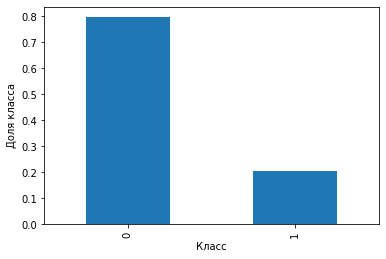

In [10]:
class_frequency=df['exited'].value_counts(normalize=2/len(df))
print(class_frequency)
class_frequency.plot(kind='bar')
plt.ylabel("Доля класса")
plt.xlabel("Класс")

***ВЫВОД 2:*** 
    - Для снижения количества признаков мы избавились от двух столбцов 'row_number', 'customer_id' и 'surname'
    - В данных наблюдается дисбаланс классов

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Верно, наблюдается дисбаланс.
</div>

# <a id='part4'> 4. ОБУЧЕНИЕ МОДЕЛЕЙ </a>
<a href='#table of contents'>к оглавлению</a>

## <a id='part5'>4.1 БЕЗ УЧЕТА ДИСБАЛАНСА КЛАССОВ</a>

Разделим данные на валидационную, тренировочну и тестовую выборки

In [11]:
features=data_ohe.drop(['exited'], axis=1)
target=data_ohe['exited']

Получим тестовую выборку

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.20, random_state=12345)

Получим тренировочную и валидационную выборки

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
features_train, target_train, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Деление выборки на 3 части проведено корректно. Чтобы классы во всех частях выборки были в одинаковых пропорциях, стоило задать аргумент stratify: train_test_split(..., stratify=...).
</div>

Стандартизируем признаки

In [14]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
display(features_train.head())
display(features_valid.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.13,-0.08,-0.17,0.08,0.82,-1.55,0.97,0.33,0,0,0
6655,-1.01,0.49,-1.45,0.14,-0.90,0.65,0.97,-0.73,0,0,1
4287,0.64,1.35,-1.13,0.36,-0.90,0.65,0.97,-0.48,1,0,1
42,-0.99,2.12,-0.81,0.65,-0.90,0.65,0.97,-0.10,0,0,0
8178,0.57,0.69,0.78,0.81,0.82,0.65,0.97,0.80,0,0,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2358,0.18,0.40,-1.13,1.39,-0.90,-1.55,0.97,-1.47,0,0,1
8463,-1.30,0.97,-0.81,-1.23,-0.90,0.65,-1.03,0.25,0,1,1
163,0.71,-0.27,-0.81,-1.23,0.82,0.65,0.97,0.12,0,1,0
3074,-0.39,0.49,0.46,0.67,-0.90,0.65,-1.03,0.59,1,0,0
5989,0.17,1.35,1.74,0.54,-0.90,-1.55,-1.03,1.46,0,0,0


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Правильно, scaler при масштабировании следует настраивать (fit) только по обучающей выборке.
</div>

***Обучим модель логистической регрессии***

In [15]:
%%time

model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid=model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

result_auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
  
result_f1=f1_score(target_valid, predictions_valid)

print()

print("AUC_ROC:", result_auc_roc, "F1_score:", result_f1)


AUC_ROC: 0.7707603807864648 F1_score: 0.3056603773584906
CPU times: user 72.4 ms, sys: 17.8 ms, total: 90.3 ms
Wall time: 55 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Вместе с F1-мерой везде измеряй значение ROC-AUC.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавил измерение ROC-AUC.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Чтобы не дублировать код, пригодилась бы функция, принимающая на вход модель, обучающую и валидационную выборки, а возвращающая F1 и ROC_AUC на валидационной выборке.~~ 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Сделал функцию для обучения модели и вывода результатов на экран. А как в этой функции создать подбор гиперпараметров? Они же разные для каждой модели или для каждой модели нужно делать отдельную функцию? Зачем она тогда нужна?
</div>

In [16]:
def learning_model (data_features_train, data_target_train, data_features_valid, data_target_valid, model):
    model.fit(data_features_train, data_target_train)
    predictions_valid=model.predict(data_features_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    result_auc_roc=roc_auc_score(data_target_valid, probabilities_one_valid)
    result__f1=f1_score(data_target_valid, predictions_valid)    
    print()
    print("F1_score:", result_f1, "AUC_ROC:", result_auc_roc) 
    return result_f1, result_auc_roc

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>   
    
~~Чтобы был возможен подбор гиперпараметров, инициализацию модели стоит вынести за пределы функции:  
def learning_model(..., model):
        model.fit(...)
        ...
Пример вызова функции:
    model = LogisticRegression(random_state=...)
    f1_lr, auc_lr = learning_model(..., model)
Замечу, что эта функция пригодится не только в этом разделе, но и во всех следующих экспериментах (бо борьбе с дисбалансом).~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента Vers2:</b> 
Влада, благодарю за подсказку! Все получилось, ура) 
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v3:</b>    
    
~~Ты передаешь в функцию model_name, а в самой функции используешь переменную model. Поэтому вместо
def learning_model(..., model_name):
    ...    
должно быть
    def learning_model(..., model)
    ...
Теперь эту функцию можно использовать во **всех** экспериментах ниже.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента Vers3:</b> 
Поправил. Функцией обязательно буду пользоваться в следующих проектах
</div>

In [17]:
model=LogisticRegression(random_state=12345)
learning_model(features_train, target_train, features_valid, target_valid, model)


F1_score: 0.3056603773584906 AUC_ROC: 0.7707603807864648


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.3056603773584906, 0.7707603807864648)

***Обучим модель дерева решений***

In [18]:
%%time

best_result = 0
best_auc=0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
    
    print("max_depth =", depth, ": ", end='')
    print("F1_score", result_f1, "AUC_ROC:", result_auc_roc)
    if result_f1 > best_result:
        best_model = model
        best_result = result_f1
        best_auc=result_auc_roc
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, "AUC_ROC:", best_auc)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


max_depth = 1 : F1_score 0.0 AUC_ROC: 0.6904695296120447
max_depth = 2 : F1_score 0.5037037037037037 AUC_ROC: 0.7396462354498909
max_depth = 3 : F1_score 0.39382239382239387 AUC_ROC: 0.7938649126794771
max_depth = 4 : F1_score 0.4318181818181818 AUC_ROC: 0.8069427246673523
max_depth = 5 : F1_score 0.544891640866873 AUC_ROC: 0.8190207258086308
max_depth = 6 : F1_score 0.5078809106830122 AUC_ROC: 0.8241016405481316
max_depth = 7 : F1_score 0.5488958990536277 AUC_ROC: 0.8275652142122556
max_depth = 8 : F1_score 0.5353846153846155 AUC_ROC: 0.7997779434415427
max_depth = 9 : F1_score 0.5392592592592592 AUC_ROC: 0.7788518547365443
max_depth = 10 : F1_score 0.5365853658536586 AUC_ROC: 0.7559452186311334
max_depth = 11 : F1_score 0.5135520684736091 AUC_ROC: 0.7442590352540617
max_depth = 12 : F1_score 0.5069637883008358 AUC_ROC: 0.7204034530828032
max_depth = 13 : F1_score 0.4966261808367072 AUC_ROC: 0.6894482601860699
max_depth = 14 : F1_score 0.49729729729729727 AUC_ROC: 0.689638208351679
ma

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Гиперпараметры настраиваются корректно.
</div>

***Обучим модель случайного леса***

Подберем глубину

In [19]:
%%time

best_result = 0
best_depth = 0
best_auc = 0
for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid=model.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
    
    print("max_depth", depth, result,  "AUC_ROC:", result_auc_roc)
    if result > best_result:
        best_result = result
        best_depth = depth
        best_auc = result_auc_roc
        
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, "Максимальная глубина:", 
      best_depth, "AUC_ROC:", best_auc)

max_depth 1 0.0 AUC_ROC: 0.7829909762699903


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


max_depth 2 0.18850574712643678 AUC_ROC: 0.7865721747395962
max_depth 3 0.23266219239373603 AUC_ROC: 0.810763146558918
max_depth 4 0.36511156186612576 AUC_ROC: 0.8252548404991742
max_depth 5 0.47358834244080145 AUC_ROC: 0.8341188233068783
max_depth 6 0.5094664371772806 AUC_ROC: 0.8415212384302493
max_depth 7 0.5252525252525253 AUC_ROC: 0.8420227333779461
max_depth 8 0.5310924369747899 AUC_ROC: 0.8441272636814339
max_depth 9 0.5268456375838927 AUC_ROC: 0.8395152586394625
max_depth 10 0.5400981996726677 AUC_ROC: 0.8388873965020925
max_depth 11 0.5507246376811594 AUC_ROC: 0.8436909392340718
max_depth 12 0.5580645161290323 AUC_ROC: 0.8350049831589889
max_depth 13 0.5530546623794211 AUC_ROC: 0.8350304155493635
max_depth 14 0.5471698113207547 AUC_ROC: 0.8242518506037808
max_depth 15 0.5457364341085271 AUC_ROC: 0.8345042829734914
max_depth 16 0.5505443234836703 AUC_ROC: 0.8296912030951219
max_depth 17 0.5545171339563864 AUC_ROC: 0.825304910517724
max_depth 18 0.5585023400936038 AUC_ROC: 0.829

Подберем количество деревьев, минимальное число объектов в узле дерева и минимальное число объектов в листьях дерева

%%script false

%%time

best_model = None
best_result = 0
best_est=0
best_min_samples_split=0
best_min_samples_leaf=0
for est in range(1, 100, 1):
    for split in range(2, 5):
        for leaf in range(1, 4):
            model = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=est, min_samples_split=split, min_samples_leaf=leaf) 
            model.fit(features_train, target_train) 
            predictions_valid = model.predict(features_valid)
            result = f1_score(target_valid, predictions_valid)
            
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result_auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
            
            print("max_est =", est, ": ", "split", split, "leaf", leaf, 'result_valid', result, "AUC_ROC:", result_auc_roc)
            if result > best_result:
                best_model = model
                best_result = result
                best_min_samples_split=split
                best_min_samples_leaf=leaf
                best_est=est
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est,
      "Минимальное количество примеров для разделения:", best_min_samples_split,
     "Минимальное количество объектов в листе:", best_min_samples_leaf)

In [20]:

%%time

model = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=17, min_samples_split=2, min_samples_leaf=1) 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)
            
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result_auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
                        
print()
print("F1_score наилучшей модели на валидационной выборке:", result, "AUC_ROC:", result_auc_roc)


F1_score наилучшей модели на валидационной выборке: 0.5840978593272171 AUC_ROC: 0.8162152152454465
CPU times: user 193 ms, sys: 0 ns, total: 193 ms
Wall time: 203 ms


***ВЫВОД 3:*** 
    - Максимальное значение метрики F1_score равное 0.584 получено для модели случайного леса, при этом для модели дерева
    решений это значение не сильно ниже. Модель логистической регресии значительно отстает по показателям от прочих моделей.
    - Подгонка гиперпараметров таких как минимальное количество примеров для разделения и объектов в листе не помогла добиться    необходимого значения метрики не хватило 0.06 пунтков при этом обучение модели заняло более 6 минут, что в десятки раз      больше чем заняло обучение других моделей
    - Добиться показателей метрики F1_score 0.59 и выше без учета дисбаланса классов не получается в разумные сроки

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Прекрасно, переходим к следующему разделу.
</div>

## <a id='part6'>4.2 C УЧЕТОМ ДИСБАЛАНСА КЛАССОВ</a>
<a href='#table of contents'>к оглавлению</a>

### <a id='part7'>4.2.1 ОБУЧИМ МОДЕЛИ С УЧЕТОМ ВЕСА</a>

***Обучим модель логистической регрессии***

In [21]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid=model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_LogReg_Balan=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_LogReg_Balan= f1_score(target_valid, predictions_valid)

print("F1_score наилучшей модели на валидационной выборке:", f1_score_LogReg_Balan, "AUC_ROC:", auc_roc_LogReg_Balan)

F1_score наилучшей модели на валидационной выборке: 0.47763864042933807 AUC_ROC: 0.7729507454074667
CPU times: user 62.5 ms, sys: 33.6 ms, total: 96.1 ms
Wall time: 68.7 ms


***Обучим модель дерева решений***

In [22]:
%%time

best_result = 0
best_auc=0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    f1_score_DecTreeClass_balan = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_DecTreeClass_balan=roc_auc_score(target_valid, probabilities_one_valid)
    
    print("max_depth =", depth, ": ", end='')
    print("F1_score", f1_score_DecTreeClass_balan, "AUC_ROC:", auc_roc_DecTreeClass_balan)
    if f1_score_DecTreeClass_balan > best_result:
        best_result = f1_score_DecTreeClass_balan
        best_auc = auc_roc_DecTreeClass_balan
        
print()
print("F1_score наилучшей модели на валидационной выборке:", 
      best_result, "AUC_ROC:", best_auc)

max_depth = 1 : F1_score 0.4750733137829912 AUC_ROC: 0.6898591522430575
max_depth = 2 : F1_score 0.49761677788369874 AUC_ROC: 0.7381902311009524
max_depth = 3 : F1_score 0.49761677788369874 AUC_ROC: 0.79092270301803
max_depth = 4 : F1_score 0.5170454545454546 AUC_ROC: 0.8064610987746356
max_depth = 5 : F1_score 0.5489078822412156 AUC_ROC: 0.818801371441651
max_depth = 6 : F1_score 0.5587044534412956 AUC_ROC: 0.8089018134883863
max_depth = 7 : F1_score 0.5531914893617021 AUC_ROC: 0.800509124664809
max_depth = 8 : F1_score 0.5417989417989418 AUC_ROC: 0.7825284246700546
max_depth = 9 : F1_score 0.5110663983903421 AUC_ROC: 0.7514722969740224
max_depth = 10 : F1_score 0.4919678714859438 AUC_ROC: 0.7260438804105424
max_depth = 11 : F1_score 0.49498327759197336 AUC_ROC: 0.7234831566047124
max_depth = 12 : F1_score 0.47149122807017546 AUC_ROC: 0.694700048798399
max_depth = 13 : F1_score 0.4908675799086758 AUC_ROC: 0.7036220492466448
max_depth = 14 : F1_score 0.4737456242707118 AUC_ROC: 0.68337

***Обучим модель случайного леса***

In [23]:
%%time

model = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=17, 
                               class_weight='balanced') 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)
f1_score_RanForClas_balan = f1_score(target_valid, predictions_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_RanForClas_balan=roc_auc_score(target_valid, probabilities_one_valid)

print()
print("F1_score наилучшей модели на валидационной выборке:", 
      f1_score_RanForClas_balan, "AUC_ROC:", auc_roc_RanForClas_balan)


F1_score наилучшей модели на валидационной выборке: 0.5524691358024691 AUC_ROC: 0.8167850597422746
CPU times: user 209 ms, sys: 0 ns, total: 209 ms
Wall time: 223 ms


### <a id='part8'>4.2.2 ПРИМЕНИМ ТЕХНИКУ upsampling</a>
<a href='#table of contents'>к оглавлению</a>

Преобразуем данные

In [24]:
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    repeat_near=len(features_zeros)/len(features_ones)
    print("features_zeros", features_zeros.shape)
    print("features_ones", features_ones.shape)
    print("target_zeros", target_zeros.shape)
    print("target_ones", target_ones.shape)
    print("repeat_near", repeat_near)

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(features_upsampled.shape)
print(target_upsampled.shape)

features_zeros (4781, 11)
features_ones (1219, 11)
target_zeros (4781,)
target_ones (1219,)
repeat_near 3.922067268252666
(9657, 11)
(9657,)


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Почему repeat=10? Значение этого коэффициента следует задать так, чтобы число объектов классов 0 и 1 примерно сравнялось.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Подобрал количество повторов.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Теперь все верно.
</div>

***Обучим модель логистической регрессии***

In [25]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled) 
predicted_valid=model.predict(features_valid)
f1_score_LogReg_UpSam = f1_score(target_valid, predictions_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_LogReg_UpSam=roc_auc_score(target_valid, probabilities_one_valid)

print()
print("F1_score наилучшей модели на валидационной выборке:", f1_score_LogReg_UpSam, "AUC_ROC:", auc_roc_LogReg_UpSam)


F1_score наилучшей модели на валидационной выборке: 0.5524691358024691 AUC_ROC: 0.772976177797841
CPU times: user 84.8 ms, sys: 29.4 ms, total: 114 ms
Wall time: 61.1 ms


***Обучим модель дерева решений***

In [26]:
%%time


best_result = 0
best_depth=0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_upsampled, target_upsampled) 
    predictions_valid = model.predict(features_valid) 
    f1_score_DecTreeClass_upsam = f1_score(target_valid, predictions_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_DecTreeClass_upsam=roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1_score", f1_score_DecTreeClass_upsam, "AUC_ROC:", auc_roc_DecTreeClass_upsam)
    if f1_score_DecTreeClass_upsam > best_result:
        best_depth=depth
        best_result = f1_score_DecTreeClass_upsam
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, "max_depth =", best_depth)

max_depth = 1 : F1_score 0.4750733137829912 AUC_ROC: 0.6898591522430575
max_depth = 2 : F1_score 0.49761677788369874 AUC_ROC: 0.7381902311009524
max_depth = 3 : F1_score 0.49761677788369874 AUC_ROC: 0.79092270301803
max_depth = 4 : F1_score 0.5170454545454546 AUC_ROC: 0.8064610987746356
max_depth = 5 : F1_score 0.5489078822412156 AUC_ROC: 0.818801371441651
max_depth = 6 : F1_score 0.5587044534412956 AUC_ROC: 0.8088890972931989
max_depth = 7 : F1_score 0.5531914893617021 AUC_ROC: 0.800509124664809
max_depth = 8 : F1_score 0.5417989417989418 AUC_ROC: 0.7825331932432498
max_depth = 9 : F1_score 0.5025227043390514 AUC_ROC: 0.7397384278649985
max_depth = 10 : F1_score 0.4883955600403632 AUC_ROC: 0.7228616525649361
max_depth = 11 : F1_score 0.4866023579849946 AUC_ROC: 0.7202882125639187
max_depth = 12 : F1_score 0.4684095860566449 AUC_ROC: 0.6930691967656357
max_depth = 13 : F1_score 0.4810126582278481 AUC_ROC: 0.6944139344066862
max_depth = 14 : F1_score 0.4694835680751174 AUC_ROC: 0.682391

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
    
~~Здесь и ниже можно не задавать class_weight='balanced', так как выборка после upsampling и так будет сбалансированной.~~
</div>

***Обучим модель случайного леса***

In [27]:
##### %%time

best_result = 0
best_est=0
best_min_samples_split=0
best_min_samples_leaf=0
max_depth=0
for est in range(1, 40, 5):
    for split in range(2, 5):
        for leaf in range(1, 4):
            for depth in range(1, 30):
                model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, min_samples_split=split, min_samples_leaf=leaf, class_weight='balanced') 
                model.fit(features_upsampled, target_upsampled) 
                predictions_valid = model.predict(features_valid)
                result = f1_score(target_valid, predictions_valid)
                print("max_est =", est, ": ", "split", split, "leaf", leaf, 'result_valid', result)
                if result > best_result:
                    best_result = result
                    best_min_samples_split=split
                    best_min_samples_leaf=leaf
                    best_est=est
                    max_depth=depth
                    
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Глубина:", max_depth,
      "Минимальное количество примеров для разделения:", best_min_samples_split,
     "Минимальное количество объектов в листе:", best_min_samples_leaf)

max_est = 1 :  split 2 leaf 1 result_valid 0.24836601307189543
max_est = 1 :  split 2 leaf 1 result_valid 0.3861920172599784
max_est = 1 :  split 2 leaf 1 result_valid 0.45199409158050224
max_est = 1 :  split 2 leaf 1 result_valid 0.5257623554153523
max_est = 1 :  split 2 leaf 1 result_valid 0.4937799043062201
max_est = 1 :  split 2 leaf 1 result_valid 0.5487122060470325
max_est = 1 :  split 2 leaf 1 result_valid 0.5163704396632367
max_est = 1 :  split 2 leaf 1 result_valid 0.5250737463126844
max_est = 1 :  split 2 leaf 1 result_valid 0.4977538185085355
max_est = 1 :  split 2 leaf 1 result_valid 0.48694029850746273
max_est = 1 :  split 2 leaf 1 result_valid 0.4867517173699705
max_est = 1 :  split 2 leaf 1 result_valid 0.5047120418848167
max_est = 1 :  split 2 leaf 1 result_valid 0.5026178010471204
max_est = 1 :  split 2 leaf 1 result_valid 0.4913419913419913
max_est = 1 :  split 2 leaf 1 result_valid 0.4801670146137787
max_est = 1 :  split 2 leaf 1 result_valid 0.4846560846560847
max_e

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
    
~~Шаг для перебора числа деревьев n_estimators можно сделать больше (5, к примеру). На качестве это не особо отразится.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента Vers2:</b> 
на тестовой выборке f1_score была меньше 0.59, поэтому я вернулся сюда и поигрался с глубиной. С новой глубиной модель выдает f1_score=0,63 на тестовых данных, но на валидационных хуже результат. И это уже подконка получается, поэтому я выбрал модель дерева решений как лучшую в итоге
</div>

Если поигратся с глубиной, то можно добиться норм результатов на тестовой выборке. В общем это 
переобучение, как я понимаю раз на тестовой выборке результаты хуже чем на валидационной, то 
произошло переобучение

In [28]:
max_depth=0
best_result=0
best_auc=0
for depth in range(1, 20):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, 
                               n_estimators=31, min_samples_split=2, min_samples_leaf=1, class_weight='balanced') 

    model.fit(features_upsampled, target_upsampled) 
    predictions_valid = model.predict(features_valid)
    f1_score_RanForClas_upsam = f1_score(target_valid, predictions_valid)

    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc_RanForClas_upsam=roc_auc_score(target_valid, probabilities_one_valid)
    print("F1_score:", f1_score_RanForClas_upsam, "AUC_ROC:", auc_roc_RanForClas_upsam, "Глубина:", max_depth,)
    if f1_score_RanForClas_upsam > best_result:
        best_result = f1_score_RanForClas_upsam
        max_depth=depth
        best_auc=auc_roc_RanForClas_upsam
        
    
print()
print("F1_score наилучшей модели на валидационной выборке:", best_result, 
      "AUC_ROC:", best_auc, "Глубина:", max_depth)

F1_score: 0.4854700854700855 AUC_ROC: 0.7777781310054217 Глубина: 0
F1_score: 0.5088207985143918 AUC_ROC: 0.8036309505832759 Глубина: 1
F1_score: 0.5154639175257731 AUC_ROC: 0.8157288207795346 Глубина: 2
F1_score: 0.5449160908193484 AUC_ROC: 0.8267267400920971 Глубина: 3
F1_score: 0.5664263645726055 AUC_ROC: 0.8381323724128504 Глубина: 4
F1_score: 0.5575129533678757 AUC_ROC: 0.838947798429232 Глубина: 5
F1_score: 0.5588235294117647 AUC_ROC: 0.8438562497715059 Глубина: 5
F1_score: 0.5745140388768898 AUC_ROC: 0.8468223022989291 Глубина: 5
F1_score: 0.5714285714285714 AUC_ROC: 0.8484277219413179 Глубина: 8
F1_score: 0.5921658986175113 AUC_ROC: 0.8478888731702586 Глубина: 8
F1_score: 0.5882352941176471 AUC_ROC: 0.8491779774573649 Глубина: 10
F1_score: 0.5870889159561511 AUC_ROC: 0.8493154713178269 Глубина: 10
F1_score: 0.5707196029776676 AUC_ROC: 0.844779763446979 Глубина: 10
F1_score: 0.5788787483702739 AUC_ROC: 0.8394294243219487 Глубина: 10
F1_score: 0.5826771653543307 AUC_ROC: 0.841871

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Отлично, качество выросло.
</div>

### <a id='part9'>4.2.3 ПРИМЕНИМ ТЕХНИКУ downsampling </a>
<a href='#table of contents'>к оглавлению</a>

Преобразуем данные

In [29]:
def downsample (features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    frac_near=len(features_ones)/len(features_zeros)
    print("features_zeros", features_zeros.shape)
    print("features_ones", features_ones.shape)
    print("target_zeros", target_zeros.shape)
    print("target_ones", target_ones.shape)
    print("frac_near", frac_near)

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

features_zeros (4781, 11)
features_ones (1219, 11)
target_zeros (4781,)
target_ones (1219,)
frac_near 0.25496758000418324


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Здесь тоже значение коэффициента fraction следует задать так, чтобы число объектов разных классов примерно сравнялось.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавил вычисление коэффициента.
</div>

***Обучим модель логистической регрессии***

In [30]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled) 
predicted_valid=model.predict(features_valid) ### здесь predicted_valid
result = f1_score(target_valid, predicted_valid) ### а здесь predictions_valid
print()
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print("F1_score:", result, "AUC_ROC:", auc_roc)


F1_score: 0.4799286351471901 AUC_ROC: 0.7738933333757205
CPU times: user 98.2 ms, sys: 60.2 ms, total: 158 ms
Wall time: 162 ms


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v3:</b>    
    
~~В коде выше опечатка. Не забудь обновить таблицу с результатами.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил опечатку
</div>

***Обучим модель дерева решений***

In [31]:
%%time

best_model = None
best_result = 0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model.fit(features_downsampled, target_downsampled) 
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
    
    print("max_depth =", depth, ": ", end='')
    print("F1_score", result, "auc_roc", auc_roc)
    if result > best_result:
        best_model = model
        best_result = result
        
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print("F1_score:", best_result)

max_depth = 1 : F1_score 0.4750733137829912 auc_roc 0.6898591522430575
max_depth = 2 : F1_score 0.49761677788369874 auc_roc 0.7381902311009524
max_depth = 3 : F1_score 0.5118376550169109 auc_roc 0.7845105615948652
max_depth = 4 : F1_score 0.49569377990430613 auc_roc 0.7928317218205141
max_depth = 5 : F1_score 0.5327659574468085 auc_roc 0.8112384143540412
max_depth = 6 : F1_score 0.5405405405405406 auc_roc 0.8105676350579144
max_depth = 7 : F1_score 0.5459662288930582 auc_roc 0.8097188290291663
max_depth = 8 : F1_score 0.5118483412322274 auc_roc 0.7701460296064813
max_depth = 9 : F1_score 0.5033365109628217 auc_roc 0.7386941103352467
max_depth = 10 : F1_score 0.4962962962962963 auc_roc 0.7287190499730576
max_depth = 11 : F1_score 0.48914069877242683 auc_roc 0.727908392529871
max_depth = 12 : F1_score 0.48451730418943534 auc_roc 0.7043810471468833
max_depth = 13 : F1_score 0.500459981600736 auc_roc 0.709324468025922
max_depth = 14 : F1_score 0.4924712134632418 auc_roc 0.7037468269119196


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~AUC_ROC вычисляется не для лучшей модели. И финальное F1-score тоже выводится не для лучшей модели.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Поправил вывод F1_Score, теперь он выводится для лучшей модели
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Я не понимаю как вывести AUC_ROC, для модели с лучшим F1_Score. Как вывести самый большой AUC_ROC - ясно,
но они же не совпадают.У модели с лучшим F1_Score AUC_ROC может быть меньше.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>    
    
~~Для этого нужно сохранять не только лучшую модель best_model и F1-меру best_result, но и соответствующее ей значение AUC_ROC:  
if result>best_result:
        ...
        best_auc=...~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Как вывести auc_roc я понимаю, но как выести auc_roc соответствующий лучшей модели - нет
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v3:</b>  
    
~~Вот так:
best_model=None
    best_result=0
    best_auc=0
    for depth in range(1, 30):
        model = ...
        ...
        if result>best_result:
            best_model=model
            best_result=result
            best_auc=auc_roc~~
~~# следующие 3 строки не нужны: ~~   
~~# probabilities_valid = model.predict_proba(features_valid)~~
~~# probabilities_one_valid = probabilities_valid[:, 1]~~
~~# auc_roc=roc_auc_score(target_valid, probabilities_one_valid)~~
~~print("F1_score:", best_result, "AUC_ROC:", best_auc)~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо, все получилось
</div>

***Обучим модель случайного леса***

In [32]:
%%time

model = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=17, class_weight='balanced') 
model.fit(features_downsampled, target_downsampled) 
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)
print()

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print("F1_score:", result, "AUC_ROC:", auc_roc)


F1_score: 0.5355805243445693 AUC_ROC: 0.8275477294438731
CPU times: user 104 ms, sys: 8.02 ms, total: 112 ms
Wall time: 122 ms


***ВЫВОД 4:*** 
    - Лучшие показатели показала модель случайного леса после применения к данным техники upsampling с показателями 
    F1_score=0,604 и AUC_ROC=0.851
    - На втором месте модель логистической регресси после техники downsampling с параметрами F1_score: 0.60 
    AUC_ROC: 0.77

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Добавь сводную таблицу с результатами: F1, ROC-AUC на валидационной выборке для разных моделей и разных способов борьбы с дисбалансом.~~
</div>

Выведем результаты в виде таблицы

In [33]:
data = {'Модели': ['LogRegr', 'DecTreeClas', 'RanForestClas'], 
        'balan_f1_score': [0.477, 0.558, 0.548],
        'upsam_f1_score': [0.548, 0.558, 0.599],
        'downsam_f1_score': [0.479, 0.545, 0.547],
        'balanc_AUC_ROC': [0.772, 0.808, 0.823],
        'upsam_AUC_ROC': [0.772, 0.808, 0.842],
        'downsam_AUC_ROC': [0.774, 0.809, 0.826]}
table = pd.DataFrame.from_dict(data)
display(table)

,Модели,balan_f1_score,upsam_f1_score,downsam_f1_score,balanc_AUC_ROC,upsam_AUC_ROC,downsam_AUC_ROC
0,LogRegr,0.48,0.55,0.48,0.77,0.77,0.77
1,DecTreeClas,0.56,0.56,0.55,0.81,0.81,0.81
2,RanForestClas,0.55,0.60,0.55,0.82,0.84,0.83


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Отлично! Числа лучше было вводить не вручную, а использовать переменные (чтобы при изменении входных данных значения в таблице менялись автоматически).
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Начал переделывать на переменные в таблице, но сил не хватило) В следующем проекте уже. 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Прекрасно, выбрали лучшие модели.
</div>

# <a id='part10'>5.ПРОВЕРКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Зачем делить тестовую выборку на части? Для настройки итоговых моделей следует использовать обучающую выборку (или обучающую + валидационную выборки), которая использовалась ранее.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Не понимаю. В тренажере мы делим тестовую выборку на тренировочную и валидационную, также как в самом начале. В прошлом проекте я так делал и мне никто ничего не сказал. Объясни, плиз. 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Дай, пожалуйста, ссылку, где именно ты видел такой подход в тренажере. 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Вот ссылка на задачу из тренажера. 
Мы подобрали оптимальные параметры и опять делим выборку на тренировочную и валидационну.  

Задача из тренажера: Метрики регрессии, задача 10 [https://praktikum.yandex.ru/trainer/data-scientist/lesson/d9d2f155-d1f3-4c13-be99-9d1a9cac315b/task/ce120cb9-d80c-4d54-9e13-86b287d423ff/  ]
</div>

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера v3:</b>    
Гиперпараметры подбирались по качеству на валидационной выборке – на тот момент выборка уже **была поделена** на обучающую и валидационную. В задаче 10 вас попросили еще раз поделить исходную выборку на 2 части. Т.е. по идее вся исходная выборка сначала делится на обучающую и валидационную, затем подбираются гиперпараметры (по качеству на валидационной выборке), после этого вычисляется качество модели с подобранными гиперпараметрами на валидационной выборке. Деление выборки на части происходит в самом начале всех экспериментов.
    

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Функции upsample и downsample были определены ранее, еще раз дублировать код не нужно.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Убрал лишний код
</div>

Проверим модель случайного леса с оптимальными гиперпараметрами

Проведем маштабирование для тестовых данных 

In [34]:
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_test.head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7867,-0.12,0.69,-0.49,-1.23,-0.90,0.65,0.97,0.98,0,1,0
1402,1.08,-0.94,1.10,0.86,-0.90,0.65,-1.03,-0.39,0,0,1
8606,1.60,0.30,0.15,-1.23,0.82,0.65,0.97,-0.44,0,1,1
8885,0.17,0.59,-0.17,0.41,0.82,0.65,0.97,1.02,0,1,1
6494,0.48,-1.03,0.78,-1.23,0.82,0.65,0.97,-1.34,0,0,1


In [36]:
model = RandomForestClassifier(random_state=12345, max_depth=23, n_estimators=31, min_samples_split=2, 
                               min_samples_leaf=1, class_weight='balanced') 

model.fit(features_upsampled, target_upsampled)

predictions_valid = model.predict(features_valid)
result_valid = f1_score(target_valid, predictions_valid)

predictions_test = model.predict(features_test)
result_test = f1_score(target_test, predictions_test)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc_test=roc_auc_score(target_test, probabilities_one_test)

print("F1_score_valid:", result_valid, "AUC_ROC_valid:", auc_roc)
print("F1_score_test:", result_test, "AUC_ROC_test:", auc_roc_test)

F1_score_valid: 0.607843137254902 AUC_ROC_valid: 0.8414822950824883
F1_score_test: 0.5819134993446919 AUC_ROC_test: 0.8512709347284607


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>  
    
~~Посмотри на разброс значений признаков в матрицах features_valid и features_test – он отличается. Дело в том, что для признаков тестовой выборки ты забыл провести масштабирование.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента Vers2:</b> Спасибо за подсказку! Исправил. Результаты на тесте лучше, чем на трейне. Это нормально вообще? Я все правильно сделал?
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v3:</b>    
    
~~Судя по коду выше, гиперпараметры лучшей модели получились другими.~~
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>    
Да, результаты на тестовой выборке могут получиться лучше, чем на валидационной, это нормально.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента Vers2:</b> Спасибо за подсказку! Исправил. Результаты на тесте лучше, чем на трейне. Это нормально вообще? Я все правильно сделал?
</div>

Проверим модель дерева решений

In [38]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6) 
model.fit(features_upsampled, target_upsampled) 

predictions_valid = model.predict(features_valid) 
predictions_test = model.predict(features_test)

f1_score_DecTreeClass_upsam = f1_score(target_valid, predictions_valid)
f1_score_DecTreeClass_upsam_test = f1_score(target_test, predictions_test)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc_DecTreeClass_upsam=roc_auc_score(target_valid, probabilities_one_valid)
auc_roc_DecTreeClass_upsam_test=roc_auc_score(target_test, probabilities_one_test)

print("F1_score_valid:", f1_score_DecTreeClass_upsam, "AUC_ROC_valid:", auc_roc_DecTreeClass_upsam)
print("F1_score_test:", f1_score_DecTreeClass_upsam_test, "AUC_ROC_test:", auc_roc_DecTreeClass_upsam_test)

F1_score_valid: 0.5587044534412956 AUC_ROC_valid: 0.8088890972931989
F1_score_test: 0.5933852140077821 AUC_ROC_test: 0.8180560125418546


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v3:</b>    
    
~~Модель логистической регрессии не является одной из лучших, F1 на валидационной выборке всего 0.48.~~
</div>

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера v4:</b>    
Для модели случайного леса качество на валидационной выборке превосходит качество на тестовой – произошло небольшое переобучение модели (слишком подогнали результаты под валидационную выборку). Чтобы этого избежать, предпочтительнее настраивать гиперпараметры моделей, ориентируясь на качество на **кросс-валидации**. В этом случае исходную выборку было бы достаточно поделить на 2 части – обучающую и тестовую, а гиперпараметры моделей и саму итоговую модель выбирать по качеству на кросс-валидации.
    
На будущее замечу, что на upsampling- и downsampling-выборках проводить стандартную процедуру кросс-валидации некорректно, так как применяя upsampling (downsampling), мы по сути меняем исходное распределение данных. А значит, некорректно измерять качество по таким данным, так как данные имеют распределение, отличное от исходного. Оценки будут смещенными. 
    
Функцию для проведения кросс-валидации в этом случае нужно было бы написать самостоятельно: в ней, как обычно, выборку надо было бы поделить на несколько частей, каждая часть по очереди становилась бы валидационной, а все остальные части – обучающей выборкой. Обучающую выборку каждый раз надо было бы увеличивать с помощью upsampling (уменьшать с помощью downsampling), обучать на ней модель, а затем вычислять качество модели на валидационной выборке (валидационную выборку увеличивать/уменьшать не нужно). Либо можно было бы найти готовую библиотеку для этого :)

</div>

***ОСНОВНОЙ ВЫВОД:*** 
    - Лучшая модель - дерева решений, с показателями на тестовой выборке - F1_score_test: 0.593 AUC_ROC_test: 0.818
    - Модель случайного леса показала себя хуже на тестовой выборке, чем на валидационной

<div style="border:solid green 2px; padding: 20px">
Дмитрий, ты провел очень качественное исследование, молодец! Отдельное спасибо за отличное оформление проекта :)
    
Доработать нужно следующее:

- для всех моделей вычислять ROC-AUC;
- корректно провести upsampling и downsampling;
- для модели решающего дерева вывести на экран F1 и ROC-AUC модели с лучшими гиперпараметрами;
- корректно оценить качество итоговых моделей на тестовой выборке;
- исправить желтые замечания (их должно быть не больше двух).

<div style="border:solid green 2px; padding: 20px">
Дмитрий, спасибо! Осталось только провести масштабирование признаков тестовой выборки.

<div style="border:solid green 2px; padding: 20px">
Дмитрий, осталось исправить мелкие неточности:
    
- исправить опечатку для модели логистической регрессии в разделе downsampling;
- внимательно задать гиперпараметры лучшей модели при проверке на тестовой выборке.

<div style="border:solid green 2px; padding: 20px">
Все в порядке, молодец!